<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/autoencoder_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
#pip install git+https://github.com/Kaggle/learntools.git

In [165]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv('DATASET1.csv')
#data.info()

In [167]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,load,weakdays,season,label
0,1,0.99833,0.99057,0.98682,0.98319,0.97557,0.97521,0.97276,0.97097,0.96949,...,0.96900,0.96591,0.96443,0.96483,0.96541,0.96693,0.67977,1,1,0
1,1,0.99834,0.99066,0.98695,0.98336,0.97583,0.97549,0.97307,0.97131,0.96986,...,0.96935,0.96630,0.96484,0.96527,0.96584,0.96737,0.67443,1,1,0
2,1,0.99834,0.99066,0.98695,0.98335,0.97582,0.97548,0.97306,0.97130,0.96985,...,0.96933,0.96629,0.96483,0.96525,0.96583,0.96736,0.67463,1,1,0
3,1,0.99832,0.99056,0.98681,0.98317,0.97554,0.97518,0.97272,0.97093,0.96944,...,0.96896,0.96586,0.96438,0.96478,0.96536,0.96688,0.68036,1,1,0
4,1,0.99829,0.99037,0.98653,0.98281,0.97497,0.97457,0.97207,0.97020,0.96865,...,0.96822,0.96503,0.96351,0.96387,0.96443,0.96596,0.69162,1,1,0


In [168]:
#data.isna().sum()

In [169]:
#data.season.value_counts()/96

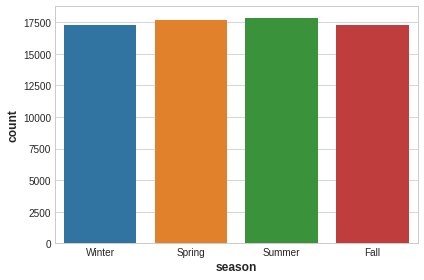

In [170]:
g = sns.countplot(data['season'])
g.set_xticklabels(['Winter','Spring', 'Summer', 'Fall'])
plt.show()

In [171]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X = normalize(X, norm="max")

In [197]:
# splitting by class
attack = data[data.label == 1]
clean = data[data.label == 0]

# undersample clean transactions
normal = clean.sample(
    int(len(attack) * 1),
    random_state=42
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([attack, normal])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values



from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=42).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Attacked'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.show;

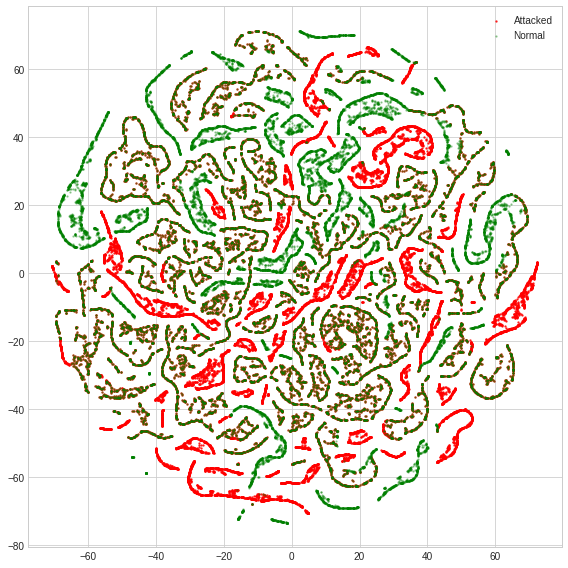

In [198]:
tsne_scatter(features, labels, dimensions=2)

In [173]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]
print(X_train.shape)

(52560, 36)


In [174]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Layer, Dense
X_train = X_train[np.where(y_train == 0)]
# Input layer
input = tf.keras.layers.Input(shape=(36,))
# Encoder layers
encoder = tf.keras.Sequential([
  Dense(36, activation='relu'),
  Dense(18, activation='relu'),
  Dense(3, activation='relu')])(input)
# Decoder layers
decoder = tf.keras.Sequential([
      Dense(8, activation="relu"),
      Dense(16, activation="relu"),
      Dense(36, activation="sigmoid")])(encoder)
# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [175]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(X_train, X_train, 
          epochs=100, 
          batch_size=128,
          validation_data=(X_valid, X_valid),
          shuffle=True)

Epoch 1/100
206/206 [==============================] - 1s 3ms/step - loss: 0.4221 - val_loss: 0.3336
Epoch 2/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2769 - val_loss: 0.3187
Epoch 3/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2709 - val_loss: 0.3170
Epoch 4/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2697 - val_loss: 0.3160
Epoch 5/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2685 - val_loss: 0.3152
Epoch 6/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2677 - val_loss: 0.3144
Epoch 7/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2667 - val_loss: 0.3134
Epoch 8/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2657 - val_loss: 0.3132
Epoch 9/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2650 - val_loss: 0.3122
Epoch 10/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2645 - val_lo

548/548 [==============================] - 1s 983us/step
The prediction loss threshold for 2% of outliers is 0.25
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      8760
           1       0.60      0.60      0.60      8760

    accuracy                           0.60     17520
   macro avg       0.60      0.60      0.60     17520
weighted avg       0.60      0.60      0.60     17520



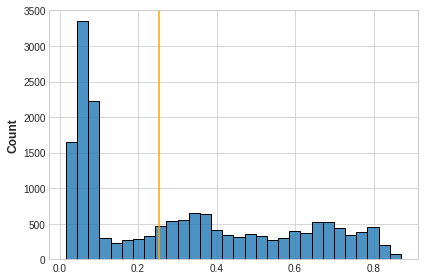

In [190]:
from sklearn.metrics import classification_report
# Predict anomalies/outliers in the training dataset
prediction = autoencoder.predict(X_valid)
# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, X_valid)
# Check the prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss, 50)
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
# Visualize the threshold
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')
# Check the model performance at 2% threshold
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
# # Check the prediction performance
print(classification_report(y_valid, threshold_prediction))

In [177]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train_principal, y_train)
     

#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
    

# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)
     

#from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
#label = DBSCAN(eps = 0.001, min_samples = 10, algorithm='ball_tree', metric='haversine').fit_predict(X_principal)
#label = db_default.labels_

     

#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 500).fit_predict(X)


#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 500).fit_predict(X)
     

#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X)
     

#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X)

In [191]:
y_pred = threshold_prediction

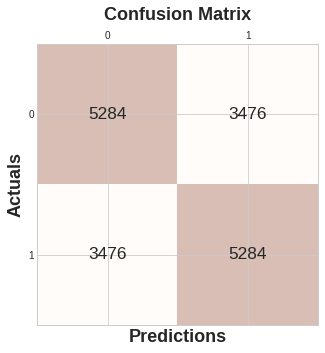

In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [193]:
print(f"f1_score is:{f1_score(y_valid, y_pred, average='binary')}\n accuracy_score is: {accuracy_score(y_valid, y_pred)}\n precision is: {precision_score(y_valid, y_pred)}\n recal is: {recall_score(y_valid, y_pred)}") 

f1_score is:0.6031963470319635
 accuracy_score is: 0.6031963470319635
 precision is: 0.6031963470319635
 recal is: 0.6031963470319635
